The control toolbox demonstrated in this notebook allows you to use many of the well-known MATLAB&reg; functions within Python, without needing MATLAB. Functions used here are `tf`, `step`, `bode`, `pole`, `lsim`, `rss`


To install the control toolbox, simply: `pip install control`.

Full documentation and details [here](https://python-control.readthedocs.io/en/0.8.3/)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define linear system transfer function using `tf`

In [2]:
from control.matlab import tf

num = [1, 2]
den = [3, 1, 1]
sys = tf(num, den) # just like in MATLAB

This defines the following transfer function:
$$\cfrac{s + 2}{3s^2 + s + 1}$$

# Step response using `step`

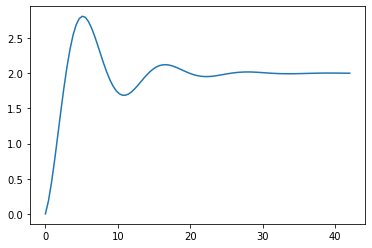

In [3]:
from control.matlab import step

yout, t = step(sys) # just like in MATLAB
plt.plot(t, yout)
plt.show()

# Bode plot using `bode`

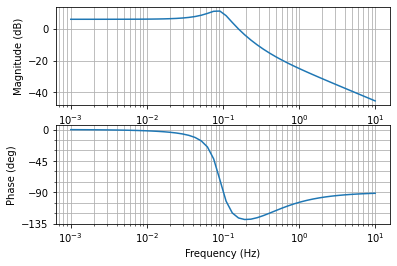

In [4]:
from control.matlab import bode

mag, phase, omega = bode(sys) # just like in MATLAB

# Extract system poles using `pole` function

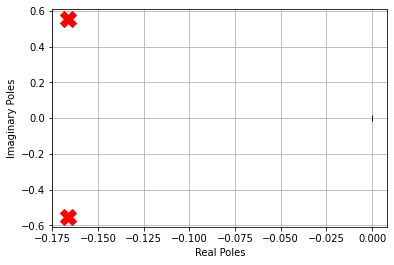

In [5]:
from control.matlab import pole

poles = pole(sys) # just like in MATLAB
real, imag = np.real(poles), np.imag(poles)
plt.plot(0, 0, 'k|') # origin
plt.plot(real, imag, 'rX', ms=16)
plt.xlabel('Real Poles')
plt.ylabel('Imaginary Poles')
plt.grid(True)
plt.show()

# Simulate forced oscillation using `lsim`

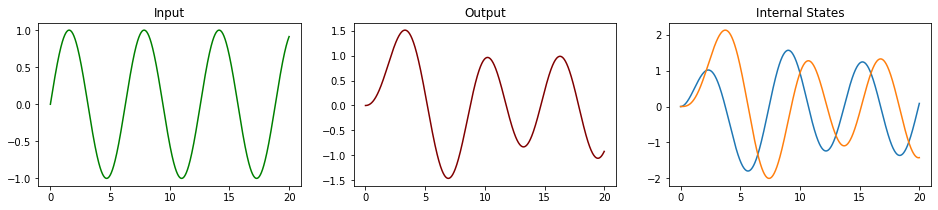

In [6]:
from control.matlab import lsim

t = np.linspace(0, 20, 1000)
u = np.sin(t)
yout, t, xout = lsim(sys, u, t) # just like in MATLAB

fig, ax = plt.subplots(1, 3, figsize=(16, 3))
ax[0].plot(t, u, 'green');ax[0].set_title('Input')
ax[1].plot(t, yout, 'maroon');ax[1].set_title('Output')
ax[2].plot(t, xout);ax[2].set_title('Internal States')
plt.show()

# Create a stable random state space (`rss`) linear system

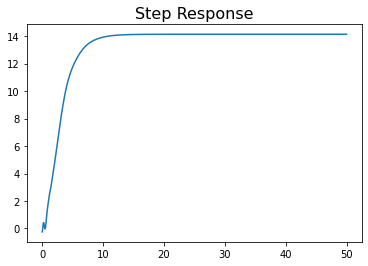

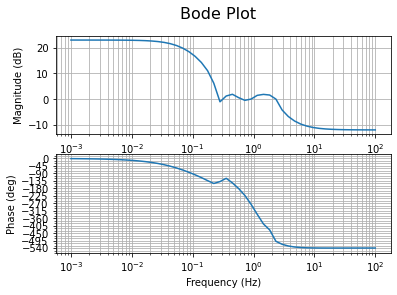

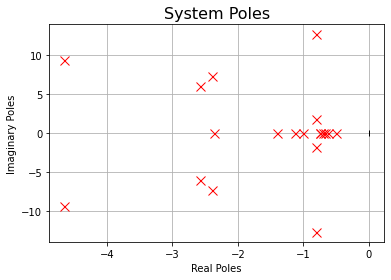

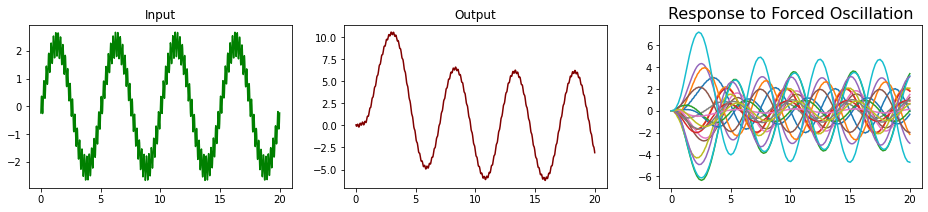

In [7]:
from control.matlab import rss

# Define random stable system
sys = rss(states=20, outputs=1, inputs=1) # just like in MATLAB

# Step Response
t = np.linspace(0, 50, 1000)
yout, t = step(sys, t)
plt.plot(t, yout)
plt.title('Step Response', fontsize=16)
plt.show()

# Bode Plot
mag, phase, omega = bode(sys)
plt.suptitle('Bode Plot', fontsize=16)

# Poles Plot
poles = pole(sys)
real, imag = np.real(poles), np.imag(poles)
plt.figure()
plt.plot(0, 0, 'k|') # origin
plt.plot(real, imag, 'rx', ms=9)
plt.grid(True)
plt.title('System Poles', fontsize=16)
plt.xlabel('Real Poles')
plt.ylabel('Imaginary Poles')
plt.show()

# Response to Forced Oscillation
t = np.linspace(0, 20, 1000)
u = 0*t
for freq in [0.2, 5]:
    u += 1/np.sqrt(freq) * np.sin(2*np.pi*freq*t + np.random.randn())
yout, t, xout = lsim(sys, u, t)

fig, ax = plt.subplots(1, 3, figsize=(16, 3))
ax[0].plot(t, u, 'green');ax[0].set_title('Input')
ax[1].plot(t, yout, 'maroon');ax[1].set_title('Output')
ax[2].plot(t, xout);ax[2].set_title('Internal States')
plt.title('Response to Forced Oscillation', fontsize=16)
plt.show()

# Identify system's frequency response
The following set of cells is an experiment which illustrates that one can probe a linear system with white noise and reconstruct the bode plot based on the output. For more info, read [this IEEE paper](https://ieeexplore.ieee.org/document/8440357), published at PMAPS 2018.

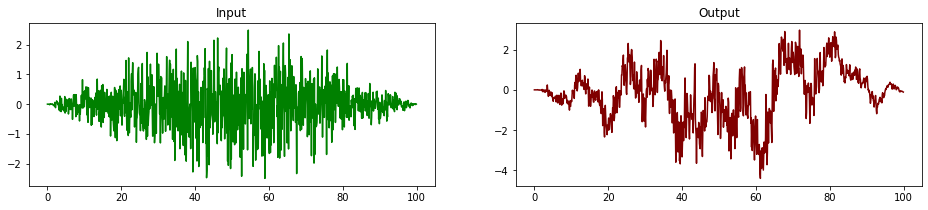

In [8]:
# num = [1, 2]
# den = [3, 1, 1]
# sys = tf(num, den)

dt = 0.1
T = 100
t = np.arange(0, T, dt)
u = np.random.randn(*t.shape)
u *= np.sin(np.pi/T*t)
y, t, _ = lsim(sys, u, t)

fig, ax = plt.subplots(1, 2, figsize=(16, 3))
ax[0].plot(t, u, 'green');ax[0].set_title('Input')
ax[1].plot(t, y, 'maroon');ax[1].set_title('Output')
plt.show()

In [9]:
# Compute FFT magnitude & phase
Y, U = np.fft.fft(y), np.fft.fft(u)
Hz = np.fft.fftfreq(len(t), t[1] - t[0])
mid = int(len(t)/2)
Y, U, Hz = Y[:mid], U[:mid], Hz[:mid] # keep only positive frequencies
Ymag = np.abs(Y) * 2 / len(y)
Umag = np.abs(U) * 2 / len(U)

Hmag = Ymag / Umag

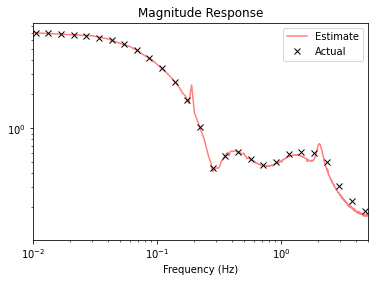

In [10]:
plt.loglog(Hz, Hmag, 'r', label='Estimate', alpha=0.5)
mag, phase, omega = bode(sys, Plot=False)
plt.loglog(omega/2/np.pi, mag/2, 'kx', label='Actual')

plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.xlim(1/T, 1/dt/2)
plt.legend()
plt.show()

# CHALLENGE TO STUDENT

Obtain input and output signals from a real/synthetic system and infer how the input and output are related. More specifically, predict the output signal for each sinusoidal input of the form $cos(\omega t)$, where $\omega$ is a variable.